In [3]:
import numpy as np
import cv2
import random
import os
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import train_test_split

In [4]:
DIRECTORY = r'E:\Minor Project\Ratino therapy\Dibetic Ratinopathy'
CATEOGRIES = ['Healthy', 'Mild DR']

In [5]:
IMG_SIZE = 200
data = []

for category in CATEOGRIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEOGRIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        # print(img_path)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))        
#         plt.imshow(img_arr)
#         break
        data.append([img_arr, label])

In [6]:
random.shuffle(data)
len(data[0])

2

In [7]:
x = []
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)

### Converting the data into Numpy arrays

In [8]:
x = np.array(x)
y = np.array(y)

In [9]:
x = x/255
x.shape


(1370, 200, 200, 3)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [11]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = x.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# https://www.youtube.com/watch?v=RFC0c3graN0
model.fit(X_train, y_train, epochs=3, validation_split=0.1)
# model.fit(X_train, y_train)

Epoch 1/3
26/26 [==============================] - 43s 2s/step - loss: 0.8660 - accuracy: 0.8206 - val_loss: 0.2861 - val_accuracy: 0.8478
Epoch 2/3
26/26 [==============================] - 38s 1s/step - loss: 0.2390 - accuracy: 0.9297 - val_loss: 0.2357 - val_accuracy: 0.9130
Epoch 3/3
26/26 [==============================] - 37s 1s/step - loss: 0.2027 - accuracy: 0.9382 - val_loss: 0.2198 - val_accuracy: 0.9130


In [21]:
prediction = model.predict(X_test)

15/15 [==============================] - 4s 241ms/step


Healthy


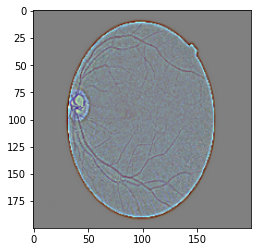

In [25]:
# print(prediction)
# count = 0
# for i in range(453):
#     if prediction[i][0] > prediction[i][1]:
#         print("Healthy")
#     else:
#         # print("Severe Dr")
#         count += 1
# print(count)
# plt.imshow(X_test[i])

i = 69
# print(prediction[i][0])
if prediction[i][0] > prediction[i][1]:
    print("Healthy")
else:
    print("Severe Dr")
plt.imshow(X_test[i])


In [16]:
print(CATEOGRIES[int(prediction[12][0])])

Healthy


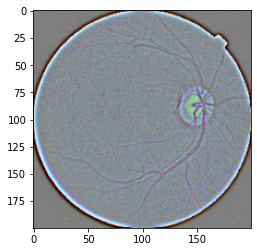

In [17]:
plt.imshow(X_test[85])
plt.show()

In [18]:
print("Evaluate model on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(X_test[:1])
print("prediction shape:", prediction.shape)

Evaluate model on test data
4/4 [==============================] - 5s 1s/step - loss: 0.1484 - accuracy: 0.9536
test loss, test acc: [0.14835579693317413, 0.9536423683166504]
Generate a prediction
1/1 [==============================] - 0s 61ms/step
prediction shape: (1, 2)
